In [3]:
import os
os.chdir('C://Users/admin/Documents/Statistical Approches of NLP/PA1_Starter_code')
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from plot_style import color_dict2, color_dict3, plot_style, hide_spines
from collections import defaultdict

from corpus import NamesCorpus, PDTBCorpus
from maxent import MaxEntClassifier
from new_features import word_count

## The Best Results (Demonstrate how to run the code)

#### Task 1: Names Classification - Name Corpus

In [6]:
# Create training data
corpus = NamesCorpus('data/names', shuffle=True)

# Initialize and train the classifier
clf = MaxEntClassifier(corpus.labels, corpus.num_features)
clf.train(corpus.train, corpus.dev, batch_size=500, lambda_value=.1, num_iter=50)

# Make prediction on the test set
results = []
for data in [corpus.train, corpus.dev, corpus.test]:
    pred = clf.classify(data['instance'])
    score = clf.accuracy(pred, data['label'])
    results.append(score)

(print('train_accuracy: {0:.4f}\ndev_accuracy:   {1:.4f}\ntest_accuracy:  {2:.4f}'
     .format(results[0], results[1], results[2])))

train_accuracy: 0.7710
dev_accuracy:   0.7860
test_accuracy:  0.7757


#### Task 2: Discourse Relation Prediction - PDTB

In [117]:
# Create training data
corpus = PDTBCorpus('data/pdtb', shuffle=True, most_common_n=200, conn_n=100)

# Add features other than unigram
corpus = word_count(corpus)

# Initialize and train the classifier
clf = MaxEntClassifier(corpus.labels, corpus.num_features)
clf.train(corpus.train, corpus.dev, batch_size=500, lambda_value=0.05, num_iter=50, learning_rate=.001)

# Make prediction on the test set
results = []
for data in [corpus.train, corpus.dev, corpus.test]:
    pred = clf.classify(data['instance'])
    score = clf.accuracy(pred, data['label'])
    results.append(score)

(print('train_accuracy: {0:.4f}\ndev_accuracy:   {1:.4f}\ntest_accuracy:  {2:.4f}'
     .format(results[0], results[1], results[2])))

train_accuracy: 0.8578
dev_accuracy:   0.8802
test_accuracy:  0.9087


In [8]:
all_results = {}

## Experiment 1 -- Training set size:

In [67]:
values = [1000, 5000, 10000, 32535]
results = {value:[] for value in values}

for value in values:
    start = time.time()
    np.random.seed(123)
    corpus = PDTBCorpus('data/pdtb', shuffle=True, most_common_n=200, conn_n=100, train_size=value)
    clf = MaxEntClassifier(corpus.labels, corpus.num_features)
    clf.train(corpus.train, corpus.dev)
    
    for data in [corpus.train, corpus.dev, corpus.test]:
        results[value].append(clf.accuracy(clf.classify(data['instance']), data['label']))
    
    end = time.time()
    (print('value: {0}, train_accuracy: {1:.4f}, dev_accuracy: {2:.4f}, test_accuracy: {3:.4f}, time: {4:.2f}'
         .format(value, results[value][0], results[value][1], results[value][2], end-start)))

all_results['train_size'] =  results

value: 1000, train_accuracy: 0.7370, var_accuracy: 0.6121, test_accuracy: 0.6282, time: 4.72
value: 5000, train_accuracy: 0.7248, var_accuracy: 0.7026, test_accuracy: 0.7427, time: 6.75
value: 10000, train_accuracy: 0.6931, var_accuracy: 0.7040, test_accuracy: 0.7334, time: 7.83
value: 32535, train_accuracy: 0.7119, var_accuracy: 0.7298, test_accuracy: 0.7602, time: 9.98


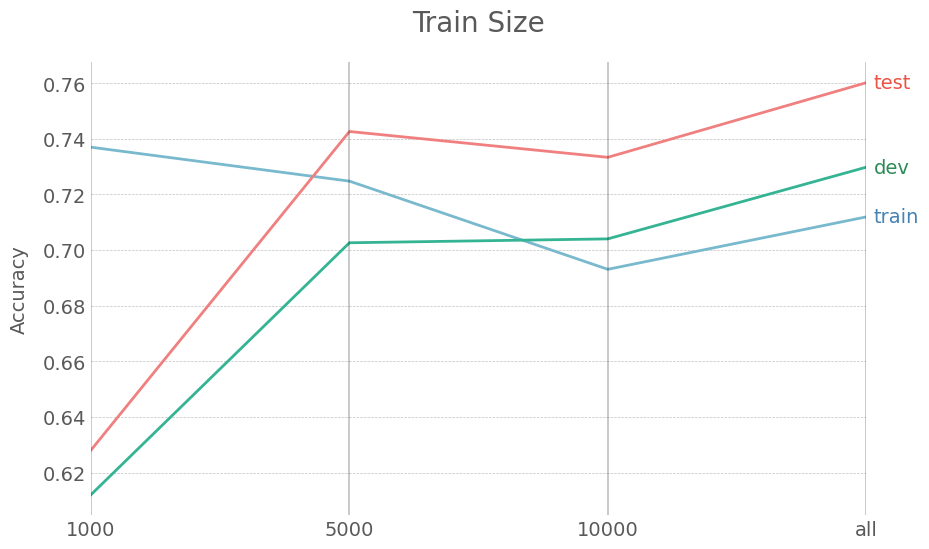

In [68]:
results_df = pd.DataFrame(all_results['train_size'], index=['train', 'dev', 'test']).reset_index()
plot_style()
fig, ax = plt.subplots(figsize=[10,6], dpi=100)

colors = ['b','g','r']
parallel_coordinates(results_df, 'index', color=[color_dict2[i] for i in colors], ax=ax, axvlines=False, linewidth=2)

hide_spines(ax)
for i in range(4):
    ax.axvline(x=i, color='black', linewidth=.3)

    
ax.set_xticklabels(['1000', '5000', '10000', 'all'])
ax.set_ylabel('Accuracy', labelpad=10, fontsize=14)
ax.tick_params(length=0)
ax.grid(True, axis='y', color='silver')


for i, row in results_df.iterrows():
    ax.text(3.03, row.iloc[-1], row['index'], color=color_dict3[colors[i]], va='center')

ax.set_title('Train Size', y=1.05, fontsize=20)
ax.legend().remove()
plt.show()

## Experiment 2 -- Batch size

In [7]:
values = [1, 10, 50, 100, 500]
results = {value:[] for value in values}

for value in values:
    start = time.time()
    np.random.seed(123)
    clf = MaxEntClassifier(corpus.labels, corpus.num_features)
    clf.train(corpus.train, corpus.dev, batch_size=value)
    
    for data in [corpus.train, corpus.dev, corpus.test]:
        results[value].append(clf.accuracy(clf.classify(data['instance']), data['label']))
    
    end = time.time()
    (print('value: {0}, train_accuracy: {1:.4f}, dev_accuracy: {2:.4f}, test_accuracy: {3:.4f}, time: {4:.2f}'
         .format(value, results[value][0], results[value][1], results[value][2], end-start)))

all_results['batch_size'] =  results

value: 1, train_accuracy: 0.2425, var_accuracy: 0.2228, test_accuracy: 0.2114, time: 26.44
value: 10, train_accuracy: 0.4522, var_accuracy: 0.4464, test_accuracy: 0.4549, time: 7.97
value: 50, train_accuracy: 0.6851, var_accuracy: 0.7033, test_accuracy: 0.7313, time: 5.79
value: 100, train_accuracy: 0.7442, var_accuracy: 0.7674, test_accuracy: 0.7989, time: 7.57
value: 500, train_accuracy: 0.8098, var_accuracy: 0.8336, test_accuracy: 0.8577, time: 13.80


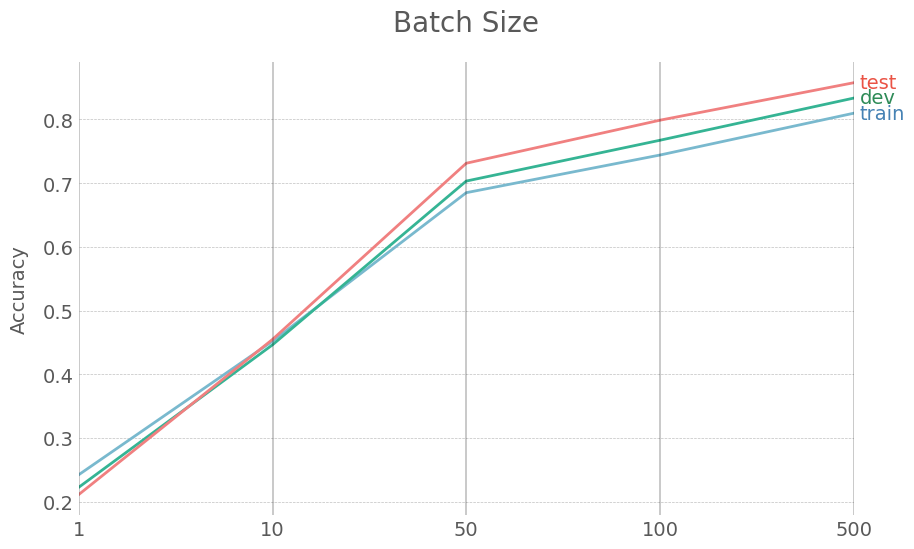

In [8]:
results_df = pd.DataFrame(all_results['batch_size'], index=['train', 'dev', 'test']).reset_index()
plot_style()
fig, ax = plt.subplots(figsize=[10,6], dpi=100)

colors = ['b','g','r']
parallel_coordinates(results_df, 'index', color=[color_dict2[i] for i in colors], ax=ax, axvlines=False, linewidth=2)

hide_spines(ax)
for i in range(5):
    ax.axvline(x=i, color='black', linewidth=.3)

#ax.set_xticklabels(batch_size)
ax.set_ylabel('Accuracy', labelpad=10, fontsize=14)
ax.tick_params(length=0)
ax.grid(True, axis='y', color='silver')
#plt.ylim(0,1)
#plt.legend(bbox_to_anchor=(1.05, 1))

for i, row in results_df.iterrows():
    ax.text(4.03, row.iloc[-1], row['index'], color=color_dict3[colors[i]], va='center')

ax.set_title('Batch Size', y=1.05, fontsize=20)
ax.legend().remove()
plt.show()

## Experiment 3 -- Lambda Value

In [9]:
values = [.1, .5, 1, 10]
results = {value:[] for value in values}


for value in values:
    start = time.time()
    np.random.seed(123)
    clf = MaxEntClassifier(corpus.labels, corpus.num_features)
    clf.train(corpus.train, corpus.dev, batch_size=500, lambda_value = value)
    
    for data in [corpus.train, corpus.dev, corpus.test]:
        results[value].append(clf.accuracy(clf.classify(data['instance']), data['label']))
    
    end = time.time()
    (print('value: {0}, train_accuracy: {1:.4f}, dev_accuracy: {2:.4f}, test_accuracy: {3:.4f}, time: {4:.2f}'
         .format(value, results[value][0], results[value][1], results[value][2], end-start)))

all_results['lambda'] =  results


value: 0.1, train_accuracy: 0.8428, var_accuracy: 0.8635, test_accuracy: 0.8860, time: 20.07
value: 0.5, train_accuracy: 0.8263, var_accuracy: 0.8468, test_accuracy: 0.8757, time: 20.68
value: 1, train_accuracy: 0.8098, var_accuracy: 0.8336, test_accuracy: 0.8577, time: 14.23
value: 10, train_accuracy: 0.6831, var_accuracy: 0.7013, test_accuracy: 0.7277, time: 3.11


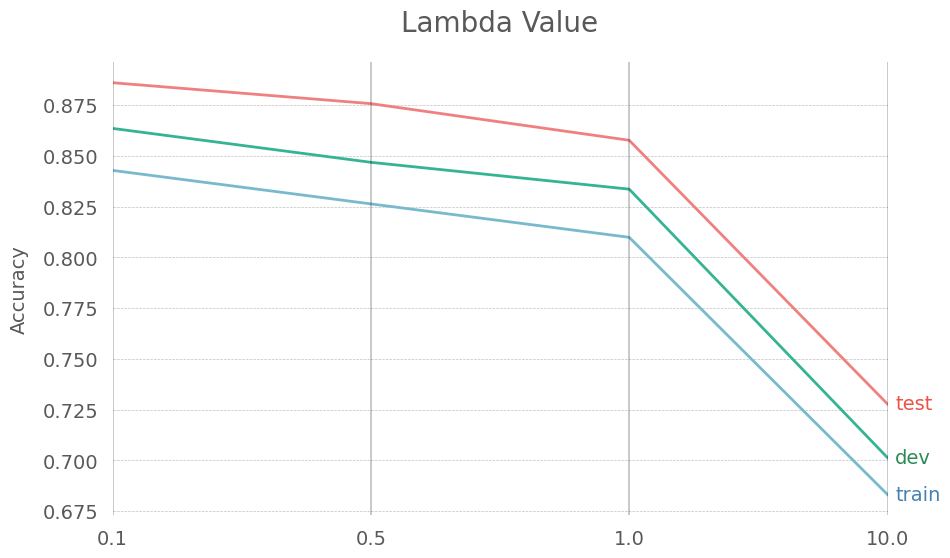

In [10]:
results_df = pd.DataFrame(all_results['lambda'], index=['train', 'dev', 'test']).reset_index()
plot_style()
fig, ax = plt.subplots(figsize=[10,6], dpi=100)

colors = ['b','g','r']
parallel_coordinates(results_df, 'index', color=[color_dict2[i] for i in colors], ax=ax, axvlines=False, linewidth=2)

hide_spines(ax)
for i in range(4):
    ax.axvline(x=i, color='black', linewidth=.3)

ax.set_ylabel('Accuracy', labelpad=10, fontsize=14)
ax.tick_params(length=0, pad=10)
ax.grid(True, axis='y', color='silver')

for i, row in results_df.iterrows():
    ax.text(3.03, row.iloc[-1], row['index'], color=color_dict3[colors[i]], va='center')

ax.set_title('Lambda Value', y=1.05, fontsize=20)
ax.legend().remove()
plt.show()

## Experiment 4 -- Feature Engineering

In [11]:
np.random.seed(123)
corpus = PDTBCorpus('data/pdtb', shuffle=True, most_common_n=200, conn_n=100)

In [9]:
from new_features import first_vocab, last_vocab, word_count, bigram, trigram
features = {'unigram': -1, 'first_vocab': first_vocab, 'last_vocab': last_vocab, 'word_count': word_count, 'bigram': bigram, 'trigram': trigram}

results = defaultdict(list)

for feature, func in features.items():
    
    start = time.time()
    np.random.seed(123)
    corpus = PDTBCorpus('data/pdtb', shuffle=True, most_common_n=200, conn_n=100)
    
    if feature !='unigram':
        corpus = features[feature](corpus)

    clf = MaxEntClassifier(corpus.labels, corpus.num_features)
    clf.train(corpus.train, corpus.dev, batch_size=500, lambda_value=.1)
    
    for data in [corpus.train, corpus.dev, corpus.test]:
        results[feature].append(clf.accuracy(clf.classify(data['instance']), data['label']))
    
    end = time.time()
    (print('feature: {0}, train_accuracy: {1:.4f}, dev_accuracy: {2:.4f}, test_accuracy: {3:.4f}, time: {4:.2f}'
         .format(feature, results[feature][0], results[feature][1], results[feature][2], end-start)))

all_results['feaure_engineering'] =  results

feature: unigram, train_accuracy: 0.8428, dev_accuracy: 0.8635, test_accuracy: 0.8860, time: 19.05
feature: first_vocab, train_accuracy: 0.6469, dev_accuracy: 0.6309, test_accuracy: 0.7169, time: 7.88
feature: last_vocab, train_accuracy: 0.6720, dev_accuracy: 0.6734, test_accuracy: 0.7390, time: 9.41
feature: word_count, train_accuracy: 0.8569, dev_accuracy: 0.8802, test_accuracy: 0.9077, time: 21.03
feature: bigram, train_accuracy: 0.8428, dev_accuracy: 0.8635, test_accuracy: 0.8860, time: 24.50
feature: trigram, train_accuracy: 0.8439, dev_accuracy: 0.8649, test_accuracy: 0.8865, time: 123.83


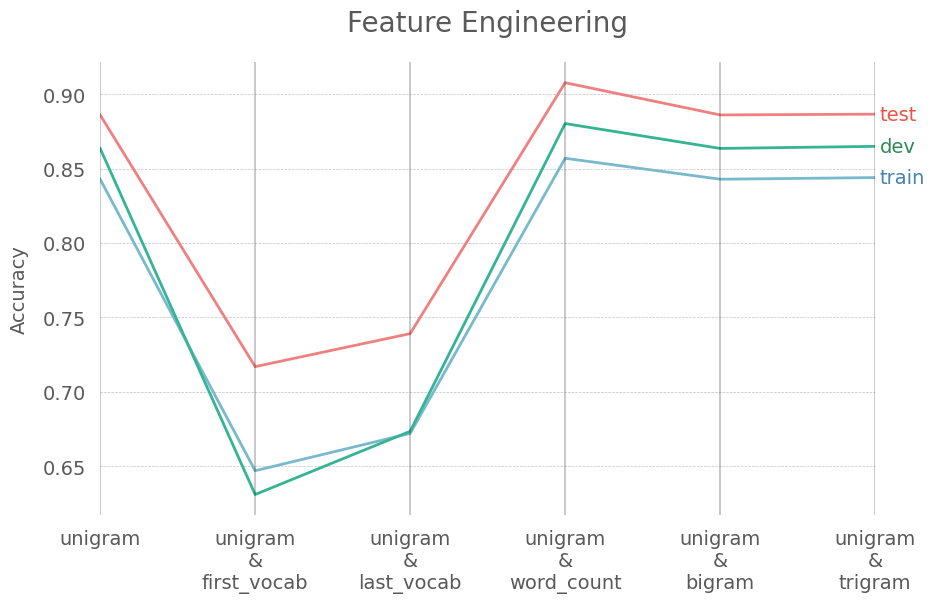

In [10]:
results_df = pd.DataFrame(all_results['feaure_engineering'], index=['train', 'dev', 'test']).reset_index()
plot_style()
fig, ax = plt.subplots(figsize=[10,6], dpi=100)

colors = ['b','g','r']
parallel_coordinates(results_df, 'index', color=[color_dict2[i] for i in colors], ax=ax, axvlines=False, linewidth=2)

hide_spines(ax)
for i in range(6):
    ax.axvline(x=i, color='black', linewidth=.3)

ax.set_xticklabels(['unigram\n&\n' + f if f != 'unigram' else f for f in features.keys()])
ax.set_ylabel('Accuracy', labelpad=10, fontsize=14)
ax.tick_params(length=0, pad=10)
ax.grid(True, axis='y', color='silver')

for i, row in results_df.iterrows():
    ax.text(5.03, row.iloc[-1], row['index'], color=color_dict3[colors[i]], va='center')

ax.set_title('Feature Engineering', y=1.05, fontsize=20)
ax.legend().remove()
plt.show()

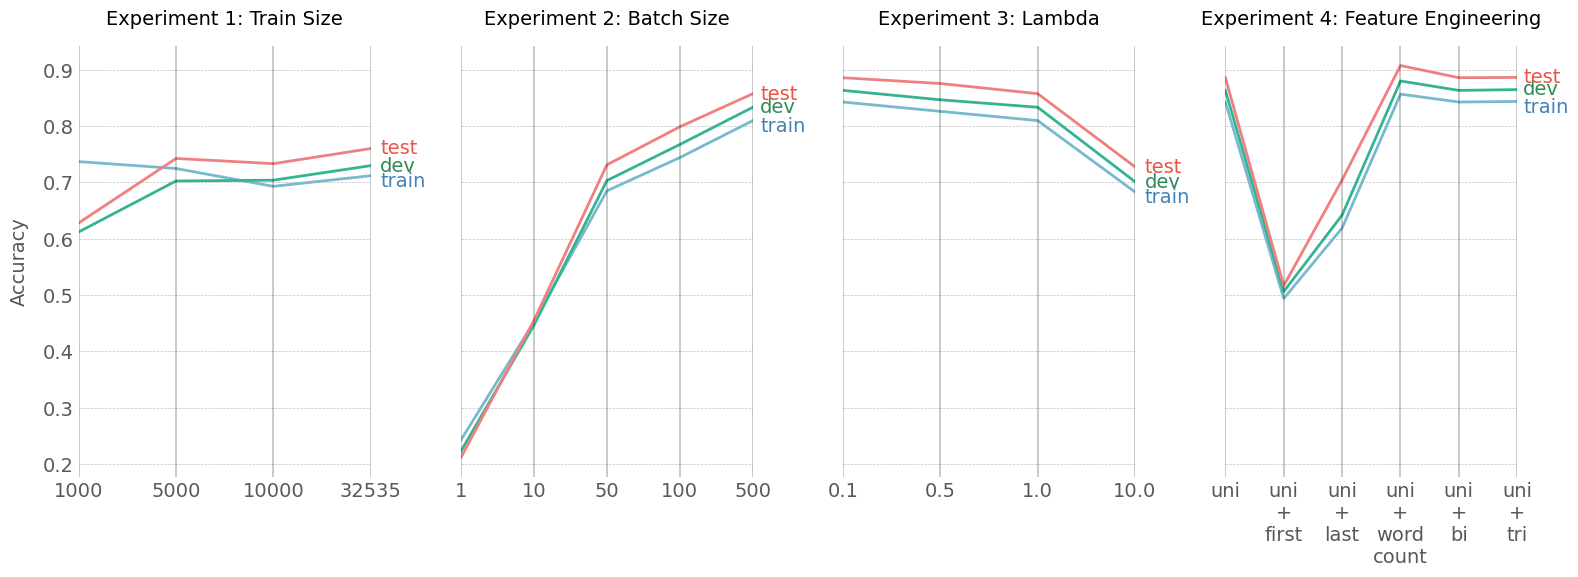

In [79]:
plot_style()
fig, ax = plt.subplots(figsize=[16,6], dpi=100, ncols=4, sharey=True)
xlabels = ['Train Size', 'Batch Size', 'Lambda', 'Feature Engineering']
colors = ['b','g','r']

for i, key in enumerate(all_results.keys()):
    labels = all_results[key].keys()
    df = pd.DataFrame(all_results[key], index=['train', 'dev', 'test']).reset_index()
    parallel_coordinates(df, 'index', color=[color_dict2[i] for i in colors], ax=ax[i], axvlines=False, linewidth=2)
    hide_spines(ax[i])

    for j in range(df.shape[1]-1):
        ax[i].axvline(x=j, color='black', linewidth=.3)
        
    for k, row in df.iterrows():
        if k == 0:
            ax[i].text(df.shape[1]-1.9, row.iloc[-1]-.01, row['index'], color=color_dict3[colors[k]], va='center')
        else:
            ax[i].text(df.shape[1]-1.9, row.iloc[-1], row['index'], color=color_dict3[colors[k]], va='center')
    
    ax[i].set_title('Experiment ' + str(i+1) + ': ' + xlabels[i], y=1.03, fontsize=14, color='black')
    ax[i].grid(True, axis='y', color='silver')
    ax[i].legend().remove()
    ax[i].tick_params(length=0)
    
ax[0].set_ylabel('Accuracy', labelpad=10, fontsize=14)
ax[3].set_xticklabels(['uni', 'uni\n+\nfirst', 'uni\n+\nlast', 'uni\n+\nword\ncount', 'uni\n+\nbi', 'uni\n+\ntri'])
    
plt.tight_layout()
plt.show()